# This notebook gives some examples of calculating interpretation quality metrics for individual molecules. 
## Typically,  you might need to obtain whole dataset metrics, then please use ready script *metrics.py* (which will do all calculations under the hood and return dataset-aggregated metrics and per-molecule metrics too)



In [1]:
import metrics as mt
from rdkit import Chem
from rdkit.Chem.Draw import SimilarityMaps
import numpy as np

RDKit WARNING: [15:54:22] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
# Load file with contributions

In [3]:
contribs = mt.read_contrib("example_notebook_data/contrib_per_atom_dc.txt")

In [4]:
contribs

,molecule,atom_pred,full,contribution,atom
0,CHEMBL100367,1.126174,1.083425,-0.042749,1.0
1,CHEMBL100367,1.113444,1.083425,-0.030019,24.0
2,CHEMBL100367,1.085988,1.083425,-0.002563,3.0
3,CHEMBL100367,1.003226,1.083425,0.080199,32.0
4,CHEMBL100367,1.089595,1.083425,-0.006170,18.0
...,...,...,...,...,...
149015,CHEMBL9994,1.936954,1.950375,0.013421,34.0
149016,CHEMBL9994,1.621082,1.950375,0.329293,32.0
149017,CHEMBL9994,1.795335,1.950375,0.155041,3.0
149018,CHEMBL9994,2.324879,1.950375,-0.374504,9.0


In [4]:
# Load ground thruth labels

In [5]:
lbls = mt.read_lbls_from_sdf(
        "example_notebook_data/N_train_lbl.sdf", lbls_field_name="lbls", sep=",")

In [6]:
lbls

,molecule,atom,lbl
0,CHEMBL379993,1,0
1,CHEMBL379993,2,0
2,CHEMBL379993,3,0
3,CHEMBL379993,4,0
4,CHEMBL379993,5,0
...,...,...,...
173463,CHEMBL1460890,24,0
173464,CHEMBL1460890,25,0
173465,CHEMBL1460890,26,0
173466,CHEMBL1460890,27,0


In [ ]:
# Merge contributions with ground truth

In [7]:
merged = mt.merge_lbls_contribs(contribs, lbls)

In [8]:
merged

,molecule,atom_pred,full,contribution,atom,lbl
0,CHEMBL100367,1.126174,1.083425,-0.042749,1.0,0
1,CHEMBL100367,1.113444,1.083425,-0.030019,24.0,0
2,CHEMBL100367,1.085988,1.083425,-0.002563,3.0,0
3,CHEMBL100367,1.003226,1.083425,0.080199,32.0,0
4,CHEMBL100367,1.089595,1.083425,-0.006170,18.0,0
...,...,...,...,...,...,...
147780,CHEMBL9994,1.936954,1.950375,0.013421,34.0,0
147781,CHEMBL9994,1.621082,1.950375,0.329293,32.0,0
147782,CHEMBL9994,1.795335,1.950375,0.155041,3.0,0
147783,CHEMBL9994,2.324879,1.950375,-0.374504,9.0,0


In [ ]:
# Now we are ready to calculate metrics for individual molecules

In [ ]:
## Let's calculate AUC. 

In [9]:
auc = mt.calc_auc(merged, which_lbls="positive", contrib_col_name="contribution")

In [10]:
auc

{'auc_pos': molecule
 CHEMBL100367    1.000000
 CHEMBL100414    0.965517
 CHEMBL100526    0.956897
 CHEMBL100758    1.000000
 CHEMBL10088     1.000000
                   ...   
 CHEMBL990       1.000000
 CHEMBL99195     1.000000
 CHEMBL99358     0.979167
 CHEMBL99618     1.000000
 CHEMBL9994      1.000000
 Length: 5895, dtype: float64}

In [ ]:
## Lets compute another metric - top-n score, with variable n (indicated by n_list parameter="infinity")

In [11]:
top_n = mt.calc_top_n(merged, n_list=[np.inf], contrib_col_name="contribution") 

In [12]:
top_n.keys() # top-n is a dictionary with bunch of dataframes

dict_keys(['select_top_n', 'variable_top_n'])

In [13]:
# this metric returns a bunch of dataframes(distionary), but we will need only the metric value itself


top_n["variable_top_n"]['top_score']

molecule
CHEMBL100367    1.000000
CHEMBL100414    0.666667
CHEMBL100526    0.750000
CHEMBL100758    1.000000
CHEMBL10088     1.000000
                  ...   
CHEMBL990       1.000000
CHEMBL99195     1.000000
CHEMBL99358     0.666667
CHEMBL99618     1.000000
CHEMBL9994      1.000000
Name: top_score, Length: 5895, dtype: float64

In [ ]:
## Lets compute  top-n score, with fixed  n = 3 and n = 5 (indicated by n_list parameter)

In [14]:
top_n = mt.calc_top_n(merged, n_list=[3,5], contrib_col_name="contribution") 

In [15]:
top_n.keys() # top-n is a dictionary with bunch of dataframes

dict_keys(['select_top_sum3', 'top_sum3', 'select_top_sum5', 'top_sum5'])

In [16]:
# this metric returns a bunch of dataframes (distionary), but we will need only the metric value itself


top_n['top_sum3']['top_score']

molecule
CHEMBL100367    1.000000
CHEMBL100414    0.666667
CHEMBL100526    0.666667
CHEMBL100758    1.000000
CHEMBL10088     1.000000
                  ...   
CHEMBL990       1.000000
CHEMBL99195     1.000000
CHEMBL99358     0.666667
CHEMBL99618     1.000000
CHEMBL9994      1.000000
Name: top_score, Length: 5895, dtype: float64

In [17]:
## Let's take a look at one molecule:

In [18]:
mols = Chem.SDMolSupplier("example_notebook_data/N_train_lbl.sdf")
m = mols[0]

In [19]:
nm = m.GetProp("_Name")

In [20]:
nm

'CHEMBL379993'

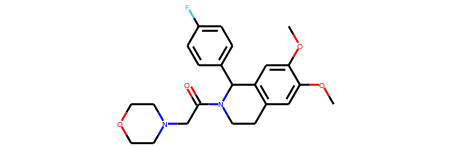

In [21]:
m

In [22]:
auc["auc_pos"][nm] # look at AUC for this molecule, it's not perfect (<1)

0.9464285714285714

In [23]:
top_n['top_sum3']['top_score'][nm] # look at top-n score for this molecule, it's only 0.5

0.5

In [ ]:
# Let's visualize contributions of atoms. Nitrogen has ground truth label "1". So contributions for nitrogens should be high

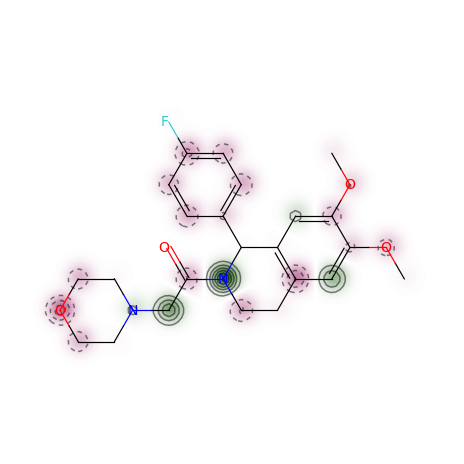

In [24]:
wt = {}
for n,atom in enumerate(Chem.rdmolfiles.CanonicalRankAtoms(m)):
                wt[atom] = contribs.loc[contribs.molecule==nm,"contribution"].iloc[n]
sim_map = SimilarityMaps.GetSimilarityMapFromWeights(m,wt)

## As we can see,  1 Nitrogen atom has the highest contribution (brightest green), but second highest contribution belongs to Carbon, so AUC is not perfect and top-n is 0.5.